In linear regression, the type of data we deal with is quantitative, whereas we use classification models to deal with qualitative data or categorical data. The algorithms used for solving a classification problem first predict the probability of each of the categories of the qualitative variables, as the basis for making the classification. And, as the probabilities are continuous numbers, classification using probabilities also behave like regression methods. 
Logistic regression is one such type of classification model which is used to classify the dependent variable into two or more classes or categories.

## Logistic Regression

Logistic regression is one such regression algorithm which can be used for performing classification problems. It calculates the probability that a given value belongs to a specific class. If the probability is more than 50%, it assigns the value in that particular class else if the probability is less than 50%, the value is assigned to the other class. Therefore, we can say that logistic regression acts as a binary classifier.

###### Working of a Logistic Model
For linear regression, the model is defined by:
$y = \beta_0 + \beta_1x  $       - (i)

and for logistic regression, we calculate probability, i.e. y is the probability of a given variable x belonging to a certain class. Thus, it is obvious that the value of y should lie between 0 and 1.

But, when we use equation(i) to calculate probability, we would get values less than 0 as well as greater than 1. That doesn’t make any sense
.
So, we need to use such an equation which always gives values between 0 and 1, as we desire while calculating the probability.


#### Sigmoid function 

We use the sigmoid function as the underlying function in Logistic regression. Mathematically and graphically, it is shown as:

<img src="sigmoid.PNG" width="300">

**Why do we use the Sigmoid Function?**

The sigmoid function’s range is bounded between 0 and 1. Thus it’s useful in calculating the probability for the  Logistic function. It’s derivative is easy to calculate than other functions which is useful during gradient descent calculation.	It is a simple way of introducing non-linearity to the model.


The logistic function is given as:

<img src="logit.JPEG" width="300">

Let’s see some manipulation with the logistic function: 

<img src="cost.JPEG" width="300">




**Prediction**

<img src="prediction.PNG" width="300">


# Evaluation 

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
data = pd.read_csv("diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
x = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [26]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.25, random_state = 355)

In [28]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\debad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = log_reg.predict(x_test)

In [30]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.765625

In [31]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[112,  13],
       [ 32,  35]], dtype=int64)

In [32]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [33]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.765625

In [34]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.896

In [35]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7777777777777778

In [36]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8327137546468402

In [37]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7091940298507463

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

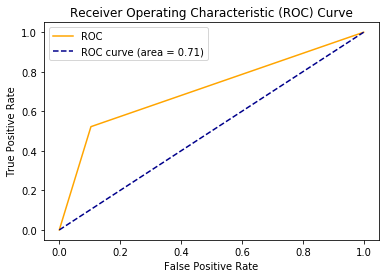

In [39]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Advantages of Logisitic Regression

* It is very simple and easy to implement.
* The output is more informative than other classification algorithms
* It expresses the relationship between independent and dependent variables
* Very effective with linearly seperable data

#### Disadvantages of Logisitic Regression

* Not effective with data which are not linearly seperable 
* Not as powerful as other classification models
* Multiclass classifications are much easier to do with other algorithms than logisitic regression
* It can only predict categorical outcomes



